## Task3

Hojin Lee (hl3328) & Hyuk Joon Kwon (hk3084)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2                  
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization, Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K


Uploading images to notebook

In [5]:
path_par = "/content/drive/My Drive/Colab Notebooks/cell_image/cell_images/Parasitized"
X=[]
Z=[]
IMG_SIZE=115
def make_train_data(label_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if(random.uniform(0, 1) < 0.1):
          try:
            label= label_type
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))      
            X.append(np.array(img))
            Z.append(str(label))
          except:
            continue; 
make_train_data('Parasitized',path_par)
print(len(X))

path_un = "/content/drive/My Drive/Colab Notebooks/cell_image/cell_images/Uninfected"
make_train_data('Uninfected',path_un)
print(len(X))

100%|██████████| 13780/13780 [04:45<00:00, 48.26it/s]

1402


Label encoding the Parasitized & Uninfected

In [0]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y_ = to_categorical(Y,2)
X_ = np.array(X)
X_ = X_/255

In [8]:
X_.shape

(2794, 115, 115, 3)

Train-test split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X_,Y_,test_size=0.25,random_state=42)

Task 3.1: Convolutional model without residual connections

In [12]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(115,115,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 115, 115, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 115, 115, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)       

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_test, y_test),
        verbose=2, shuffle=True)

Train on 2095 samples, validate on 699 samples
Epoch 1/10
 - 21s - loss: 0.6991 - accuracy: 0.5208 - val_loss: 0.6851 - val_accuracy: 0.5594
Epoch 2/10
 - 21s - loss: 0.6843 - accuracy: 0.5527 - val_loss: 0.6821 - val_accuracy: 0.5866
Epoch 3/10
 - 21s - loss: 0.6775 - accuracy: 0.5871 - val_loss: 0.6741 - val_accuracy: 0.5594
Epoch 4/10
 - 21s - loss: 0.6404 - accuracy: 0.6430 - val_loss: 0.6157 - val_accuracy: 0.6609
Epoch 5/10
 - 21s - loss: 0.5557 - accuracy: 0.7193 - val_loss: 0.4754 - val_accuracy: 0.7983
Epoch 6/10
 - 21s - loss: 0.3928 - accuracy: 0.8377 - val_loss: 0.3178 - val_accuracy: 0.9084
Epoch 7/10
 - 21s - loss: 0.2266 - accuracy: 0.9260 - val_loss: 0.1924 - val_accuracy: 0.9371
Epoch 8/10
 - 21s - loss: 0.1803 - accuracy: 0.9337 - val_loss: 0.2096 - val_accuracy: 0.9313
Epoch 9/10
 - 21s - loss: 0.1367 - accuracy: 0.9518 - val_loss: 0.2105 - val_accuracy: 0.9313
Epoch 10/10
 - 21s - loss: 0.1221 - accuracy: 0.9556 - val_loss: 0.1770 - val_accuracy: 0.9485


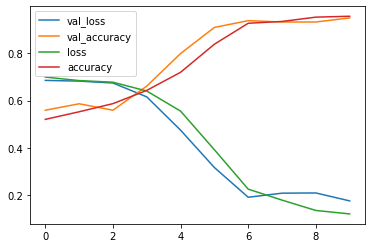

In [20]:
pd.DataFrame(history.history).plot()

Task 3.2: augmenting the data using rotations, mirroring and other transofrmation

In [24]:
datagen = ImageDataGenerator( 
    featurewise_center=True, 
    featurewise_std_normalization=True, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True,
    vertical_flip=True)

datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), 
                    steps_per_epoch=len(x_train) / 32, epochs=10,validation_data=datagen.flow(x_test, y_test, batch_size=32))

Epoch 1/10
66/65 [==============================] - 30s 450ms/step - loss: 0.1885 - accuracy: 0.9370 - val_loss: 0.1560 - val_accuracy: 0.9328
Epoch 2/10
66/65 [==============================] - 29s 434ms/step - loss: 0.1818 - accuracy: 0.9403 - val_loss: 0.1832 - val_accuracy: 0.9485
Epoch 3/10
66/65 [==============================] - 29s 435ms/step - loss: 0.1733 - accuracy: 0.9356 - val_loss: 0.0828 - val_accuracy: 0.9528
Epoch 4/10
66/65 [==============================] - 29s 434ms/step - loss: 0.1682 - accuracy: 0.9432 - val_loss: 0.3127 - val_accuracy: 0.9528
Epoch 5/10
66/65 [==============================] - 29s 436ms/step - loss: 0.1700 - accuracy: 0.9399 - val_loss: 0.4037 - val_accuracy: 0.9442
Epoch 6/10
66/65 [==============================] - 29s 434ms/step - loss: 0.1707 - accuracy: 0.9427 - val_loss: 0.2017 - val_accuracy: 0.9542
Epoch 7/10
66/65 [==============================] - 29s 435ms/step - loss: 0.1728 - accuracy: 0.9422 - val_loss: 0.0272 - val_accuracy: 0.9428

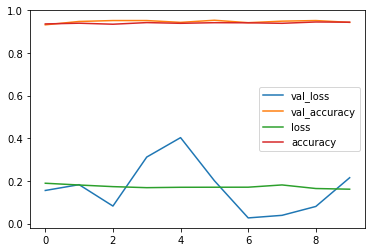

In [25]:
pd.DataFrame(history.history).plot()

Task 3.3: building a deeper model with residual connections

Deeper model with residuals (skip)

In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten , add
from keras.models import Model

num_classes = 2
inputs = Input(shape=(115,115,3))

conv1_1 = Conv2D(32, (3, 3), activation='relu',padding='same')(inputs) 
conv1_2 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv1_1) 

maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)

skip1 = add([maxpool1, conv2_2])
maxpool2 = MaxPooling2D(pool_size=(2, 2))(skip1)
conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)

skip2 = add([maxpool2, conv3_2])
maxpool3 = MaxPooling2D(pool_size=(2, 2))(skip2)
conv4_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_1)

skip3 = add([maxpool3, conv4_2])
maxpool4 = MaxPooling2D(pool_size=(2, 2))(skip2)
conv5_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool4)
conv5_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5_1)

maxpool5 = MaxPooling2D(pool_size=(2, 2))(conv5_2)
flat = Flatten()(maxpool5)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
model = Model(inputs=inputs, outputs=predictions)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 115, 115, 3)  0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 115, 115, 32) 896         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 115, 115, 32) 9248        conv2d_101[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D) (None, 57, 57, 32)   0           conv2d_102[0][0]                 
____________________________________________________________________________________________

In [52]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_test, y_test),
        verbose=2, shuffle=True)

Train on 2095 samples, validate on 699 samples
Epoch 1/10
 - 105s - loss: 0.6863 - accuracy: 0.5570 - val_loss: 0.6667 - val_accuracy: 0.5751
Epoch 2/10
 - 104s - loss: 0.5470 - accuracy: 0.7470 - val_loss: 0.4425 - val_accuracy: 0.7368
Epoch 3/10
 - 104s - loss: 0.2013 - accuracy: 0.9317 - val_loss: 0.2117 - val_accuracy: 0.9471
Epoch 4/10
 - 104s - loss: 0.1399 - accuracy: 0.9513 - val_loss: 0.1630 - val_accuracy: 0.9628
Epoch 5/10
 - 104s - loss: 0.1228 - accuracy: 0.9589 - val_loss: 0.1628 - val_accuracy: 0.9614
Epoch 6/10
 - 104s - loss: 0.1044 - accuracy: 0.9661 - val_loss: 0.2452 - val_accuracy: 0.9614
Epoch 7/10
 - 104s - loss: 0.1048 - accuracy: 0.9685 - val_loss: 0.1995 - val_accuracy: 0.9585
Epoch 8/10
 - 104s - loss: 0.1025 - accuracy: 0.9680 - val_loss: 0.3125 - val_accuracy: 0.9514
Epoch 9/10
 - 104s - loss: 0.1178 - accuracy: 0.9609 - val_loss: 0.2729 - val_accuracy: 0.9628
Epoch 10/10
 - 104s - loss: 0.0875 - accuracy: 0.9718 - val_loss: 0.2531 - val_accuracy: 0.9499


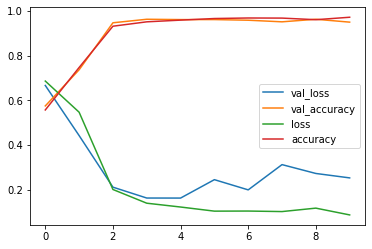

In [53]:
pd.DataFrame(history.history).plot()

Deeper model without residuals (skip)

In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten , add
from keras.models import Model

num_classes = 2
inputs = Input(shape=(115,115,3))

conv1_1 = Conv2D(32, (3, 3), activation='relu',padding='same')(inputs) 
conv1_2 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv1_1) 

maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)

maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
conv3_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)

maxpool3 = MaxPooling2D(pool_size=(2, 2))(conv3_2)
conv4_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4_1)

maxpool4 = MaxPooling2D(pool_size=(2, 2))(conv4_2)
conv5_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool4)
conv5_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5_1)

maxpool5 = MaxPooling2D(pool_size=(2, 2))(conv5_2)
flat = Flatten()(maxpool5)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
model = Model(inputs=inputs, outputs=predictions)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_test, y_test),
        verbose=2, shuffle=True)

Train on 2095 samples, validate on 699 samples
Epoch 1/10
 - 108s - loss: 0.6939 - accuracy: 0.4768 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 2/10
 - 104s - loss: 0.6934 - accuracy: 0.4931 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 3/10
 - 104s - loss: 0.6929 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 4/10
 - 104s - loss: 0.6935 - accuracy: 0.4979 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 5/10
 - 105s - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 6/10
 - 105s - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 7/10
 - 109s - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6935 - val_accuracy: 0.4907
Epoch 8/10
 - 105s - loss: 0.6933 - accuracy: 0.5055 - val_loss: 0.6933 - val_accuracy: 0.4907
Epoch 9/10
 - 104s - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.4907
Epoch 10/10
 - 104s - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6934 - val_accuracy: 0.4907


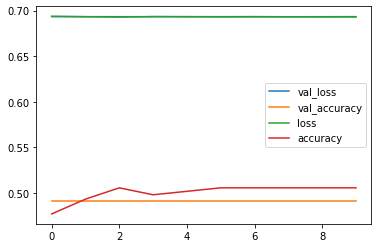

In [60]:
pd.DataFrame(history.history).plot()

We can compare two graphs and see how deep models cannot train when we remove residuals. Deep model with skip (residuals) results in high accuracy (~95%) for both training and validation set, while the model without residual results in only ~50% accuracy on both training and validation. This is due to typical vanishing gradient problem.